In [1]:
import tensorflow
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv(r"C:\Users\diviit\Downloads\Churn_Modelling (1).csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
X = df.iloc[:, 3:13]
Y = df.iloc[:, 13]
print(X.head(5))
print("\n")
print(Y.head(5))

   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1        101348.88  
1          0               1        112542.58  
2          1               0        113931.57  
3          0               0         93826.63  
4          1               1         79084.10  


0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64


In [4]:
geography = pd.get_dummies(X["Geography"], drop_first=True)
gender = pd.get_dummies(X["Gender"], drop_first=True)
print(geography.head(5))
print("\n")
print(gender.head(5))

   Germany  Spain
0        0      0
1        0      1
2        0      0
3        0      0
4        0      1


   Male
0     0
1     0
2     0
3     0
4     0


In [5]:
X = pd.concat([X, geography, gender],axis=1)
X = X.drop(["Geography","Gender"],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [6]:
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [7]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [9]:
classifier = Sequential()
classifier.add(Dense(units=6, kernel_initializer="he_uniform", activation='relu', input_dim=11 ))
classifier.add(Dense(units=6, kernel_initializer="he_uniform", activation="relu"))
classifier.add(Dense(units=1, kernel_initializer="glorot_uniform", activation="sigmoid"))

classifier.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [10]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
model_history = classifier.fit(X_train,Y_train,validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
536/536 [==============================] - 2s 2ms/step - loss: 0.6523 - accuracy: 0.6804 - val_loss: 0.5082 - val_accuracy: 0.7929
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4826 - accuracy: 0.8009 - val_loss: 0.4713 - val_accuracy: 0.7989
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4499 - accuracy: 0.8089 - val_loss: 0.4512 - val_accuracy: 0.8042
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4297 - accuracy: 0.8087 - val_loss: 0.4322 - val_accuracy: 0.8020
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4130 - accuracy: 0.8156 - val_loss: 0.4170 - val_accuracy: 0.8126
Epoch 6/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3969 - accuracy: 0.8250 - val_loss: 0.4009 - val_accuracy: 0.8217
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3810 - accuracy: 0.8362 - val_loss: 0.3865 - val_accuracy: 0.8292

In [12]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


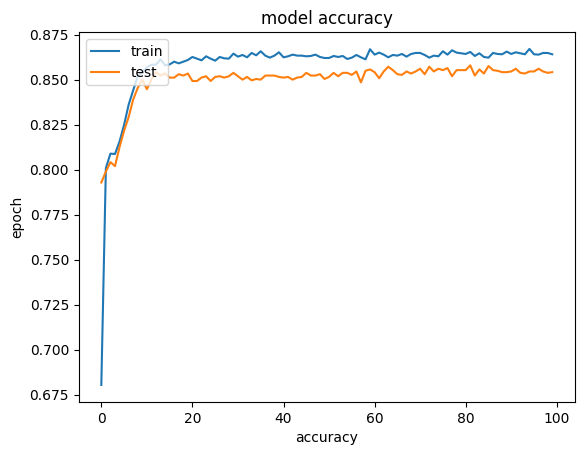

In [14]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('epoch')
plt.xlabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [15]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

63/63 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,Y_test)
cm

array([[1517,  199],
       [  78,  206]], dtype=int64)

In [17]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, Y_test)
score

0.8615